# Hypothesis Testing (Compairing the mean)

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

1. Has the network latency gone up since we switched internet service providers?

    - Null Hyp: New network lantency is > old network latency
    - Alt Hyp: New network lantency <= old network lantency
    
        - True positive: Trial result  identify that new network lantency is increased (becoming greater that old network lantency), and result match initial Hypothesis.

        - True negative: Trial result  identify that new network lantency is increased (becoming greater that old network lantency), and result don't match initial Hypothesis.

        - False negative: Trial result  identify that new network lantency is decreased (becoming less that old network lantency), and result don't match initial Hypothesis.
        - False positive: Trial result  identify that new network lantency is decreased (becoming less that old network lantency), and result match initial Hypothesis

2. Is the website redesign any good?
    - Null Hyp: Website redesign is > old website design.
    - Alt Hyp: Website redesign is <= old website design
        - True positive: Trial result identify website redesign is better (being better than old website design) and match the initial hypothesis.
        - True negative: Trial result identify website redesign is better (being better than old website design) and don't match the initial hypothesis.
        - False positive: Trial result identify website redesign is worst (being less than than old website design) and match the initial hypothesis.
        - False negative: Trial result identify website redesign is worst (being less than than old website design) and don't match the initial hypothesis.

### Tests
_______________________________________________________________________

|Goal|$H_{0}$|Data Needed|Parametric Test|Assumptions*|Non-parametric Test|  
|---|---|---|---|---|---|  
|Compare observed mean to theoretical one|$\mu_{obs} = \mu_{th}$|array-like of observed values & float of theoretical|One sample t-test: **scipy.stats.ttest_1samp**|Normally Distributed\*\*|One sample Wilcoxon signed rank test|   
|Compare two observed means (independent samples)|$\mu_{a} = \mu_{b}$|2 array-like samples|Independent t-test (or 2-sample): **scipy.stats.ttest_ind**|Independent, Normally Distributed\*\*, Equal Variances\*\*\*|Mann-Whitney's test|   
|Compare several observed means (independent samples)|$\mu_{a} = \mu_{b} = \mu_{n}$|n array-like samples|ANOVA: **scipy.stats.f_oneway**|Independent, Normally Distributed\*\*, Equal Variances|Kruskal-Wallis test|   

\*If assumptions can't be met, the equivalent non-parametric test can be used.   
\*\*Normal Distribution assumption can be be met by having a large enough sample (due to Central Limit Theorem), or the data can be scaled using a Gaussian Scalar.   
\*\*\*The argument in the stats.ttest_ind() method of `equal_var` can be set to `False` to accomodate this assumption. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import env
import pydataset as datasets
import datetime

np.random.seed(234)

1. Answer with the type of test you would use (assume normal distribution):

- Is there a difference in grades of students on the second floor compared to grades of all students?
    - Since I am comparing **one** observed mean to a theoretical mean (mean of all the data), I need to use the **`One Sample T-Test`**.
- Are adults who drink milk taller than adults who dont drink milk?
    - Because I am comparing **two** observed means (independent samples), I will use the **`Two Sample T-Test`** or the ***`Independent T-Test`*.
- Is the the price of gas higher in texas or in new mexico?
    - Because I am comparing **two** observed means (independent samples), I will use the **`Two Sample T-Test`** or the ***`Independent T-Test`*.
- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
    - Because I am comparing **Three** observed means (independent samples), I will use the **`ANOVA Analysis of Varience`**.

2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [2]:
# smaple number 1
sales1 =40
sales1_mean = 90
sales1_std = 15

# smape number 2
sales2 =50
sales2_mean = 100
sales2_std = 20

Question: whether the average time it takes to sell homes is different for its two offices.

**Step 1: Plot the distributions**

(array([1., 0., 1., 2., 5., 6., 7., 6., 8., 4.]),
 array([ 43.06673037,  50.27703574,  57.48734112,  64.69764649,
         71.90795187,  79.11825724,  86.32856262,  93.53886799,
        100.74917337, 107.95947874, 115.16978412]),
 <BarContainer object of 10 artists>)

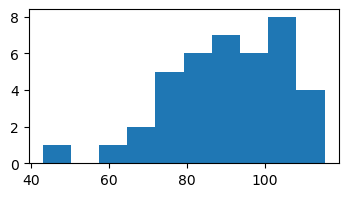

In [3]:
sales1_distribution = stats.norm(sales1_mean, sales1_std)
sales1_sample_distribution = sales1_distribution.rvs(sales1)

plt.figure(figsize=(4,2))
plt.hist(sales1_sample_distribution)

(array([1., 3., 5., 8., 6., 8., 8., 7., 1., 3.]),
 array([ 56.58325885,  65.88359227,  75.1839257 ,  84.48425913,
         93.78459255, 103.08492598, 112.38525941, 121.68559283,
        130.98592626, 140.28625969, 149.58659311]),
 <BarContainer object of 10 artists>)

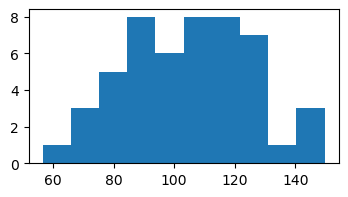

In [4]:
sales2_distribution = stats.norm(sales2_mean, sales2_std)
sales2_sample_distribution = sales2_distribution.rvs(sales2)

plt.figure(figsize=(4,2))
plt.hist(sales2_sample_distribution)

**Step 2: Estabish Hypothesis**

In [5]:
# look at there mean
sales1_distribution.mean(), sales2_distribution.mean()

(90.0, 100.0)

In [6]:
# look at there mean
sales1_distribution.var(), sales2_distribution.var()

(225.0, 400.0)

I will decide my null hypothesis bases on the initial question.
- Null Hypothesis: The average time it takes to sell office one = the average time it takes to sell office 2
- Alternate Hypothesis: The average time it takes to sell office one != the average time it takes to sell office 2

**Step 3: Set Significant level**
- 0.05 for 95% accuracy

In [7]:
Alpha = 0.05

**Step 4: Verify Assumptions**
- Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)

**Step 5: Compute test statistic and probability (t-statistic & p-value) using**

In [8]:
# To identify if varience is equal or not equal we run the levene function
# stats Levene test - returns p value. small p-value means unequal variances

t_stats,p_value = stats.levene(sales1_sample_distribution,sales2_sample_distribution)
t_stats,p_value

(4.4571955612322975, 0.03759047278621146)

With my `p_value` being greater the the `Alpha`, It shows that the **varience are equal** in the two groups.

Now let plog it in the independent sample t-test.

In [9]:
# impliment the two sample T-Test for our example
# Equal Variances (the scipy methods we will use has an argument to handle when variances aren't equal).

Final_t_stats,Final_p_value = stats.ttest_ind(sales1_sample_distribution,sales2_sample_distribution, equal_var=True)
Final_p_value

0.0008355672309800466

**Decide**

In [10]:
if (t_stats > 0) and (Final_p_value < Alpha):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

We can reject the null hypothesis


Becose the `Final_p_value` is less than the `Alpha` value, we can reject the hypothesis.

**3. Load the mpg dataset and use it to answer the following questions:**

In [11]:
mpg = datasets.data("mpg")
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


**a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?**

Should I use arithmetic mean or harmonic mean for average mpg?
- Arithmetic Mean: fe_am = (cty + hwy)/2
- Harmonic Mean: fe_hm = 2/(1/cty + 1/hwy)

We will use harmonic mean because it is more appropriate for taking the average of rates, such as miles per gallon.

In [12]:
mpg["total_miles"] = 2/(1/mpg["cty"]) + (1/mpg["hwy"])
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,total_miles
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,36.034483
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,42.034483
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,40.032258


**Step 1: Plot the distributions**

(array([ 2.,  5.,  6., 17., 18., 25., 19., 10.,  9.,  6.]),
 array([14.05306986, 17.67071963, 21.2883694 , 24.90601918, 28.52366895,
        32.14131873, 35.7589685 , 39.37661827, 42.99426805, 46.61191782,
        50.2295676 ]),
 <BarContainer object of 10 artists>)

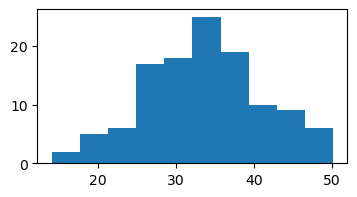

In [13]:
# retreive only the total miles column
cars1 = mpg[mpg["year"] == 2008].total_miles

# get mean and standard deviation to create the normal distribution
cars1_mean, cars1_std = cars1.mean(), cars1.std()

# get normal distribution
cars1_dristribution = stats.norm(cars1_mean, cars1_std)
cars1_sample_dristribution = cars1_dristribution.rvs(len(cars1))

# visual
plt.figure(figsize=(4,2))
plt.hist(cars1_sample_dristribution)

(array([ 5., 14., 18., 23., 24., 19.,  9.,  4.,  0.,  1.]),
 array([14.19901379, 19.18439997, 24.16978615, 29.15517234, 34.14055852,
        39.12594471, 44.11133089, 49.09671707, 54.08210326, 59.06748944,
        64.05287562]),
 <BarContainer object of 10 artists>)

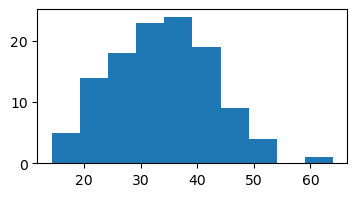

In [14]:
cars2 = mpg[mpg["year"] == 1999].total_miles

# get mean and standard deviation to create the normal distribution
cars2_mean, cars2_std = cars2.mean(), cars2.std()

# get normal distribution
cars2_dristribution = stats.norm(cars2_mean, cars2_std)
cars2_sample_dristribution = cars2_dristribution.rvs(len(cars2))

# visual
plt.figure(figsize=(4,2))
plt.hist(cars2_sample_dristribution)

**Step 2: Estabish Hypothesis**

In [15]:
# look at there mean
cars1_dristribution.mean(), cars2_dristribution.mean()

(33.447403709944105, 34.07975916744293)

In [16]:
# look at there varience
sales1_distribution.var(), sales2_distribution.var()

(225.0, 400.0)

I will decide my null hypothesis bases on the initial question.
- Null Hypothesis: Their is no significant difference in flue efficiency between 2008 cars and 1999 cars.
- Alternate Hypothesis: Their is a significant difference in flue efficiency between 2008 cars and 1999 cars.

**Step 3: Set Significant level**
- 0.05 for 95% accuracy

In [17]:
Alpha = 0.05

**Step 4: Verify Assumptions**
- Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)

**Step 5: Compute test statistic and probability (t-statistic & p-value) using**

In [18]:
# To identify if varience is equal or not equal we run the levene function
# stats Levene test - returns p value. small p-value means unequal variances
t_stats,p_value = stats.levene(cars1_sample_dristribution,cars2_sample_dristribution)
t_stats,p_value

(3.0734051844373464, 0.08090336863534618)

With my `p_value` being greater the the `Alpha`, It shows that the **varience are equal** in the two groups.

Now let plog it in the independent sample t-test.

In [19]:
# impliment the two sample T-Test for our example
# Equal Variances (the scipy methods we will use has an argument to handle when variances aren't equal).
Final_t_stats,Final_p_value = stats.levene(cars1_sample_dristribution,cars2_sample_dristribution)
Final_p_value

0.08090336863534618

**Decide**

In [20]:
if (t_stats > 0) and (Final_p_value < Alpha):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis


Because the `Final_p_value` is greater than the `Alpha`, we fail to reject the null hypothesis

**b. Are compact cars more fuel-efficient than the average car?**

**Step 1: Plot the distributions**

- Harmonic Mean: fe_hm = 2/(1/cty + 1/hwy) -> total_miles column

We will use harmonic mean because it is more appropriate for taking the average of rates, such as miles per gallon.

In [21]:
compact_cars = mpg[mpg["class"] == "compact"].total_miles # get only compact cars
all_cars = mpg[mpg["class"] != "compact"].total_miles # full data with out compact cars

# get mean and std for runing the distribution
compact_cars_mean, compact_cars_std = compact_cars.mean(), compact_cars.std()
all_cars_mean, all_cars_std = all_cars.mean(), all_cars.std()


# get normal distribution
compact_cars_distribution = stats.norm(compact_cars_mean,compact_cars_std)
all_cars_distribution = stats.norm(all_cars_mean,all_cars_std)

# get random values
compact_cars_sample_distribution = compact_cars_distribution.rvs(100_000)
all_cars_sample_distribution = compact_cars_distribution.rvs(100_000)

compact_cars_sample_distribution, all_cars_sample_distribution

(array([52.71354301, 30.23109526, 40.38561709, ..., 33.1172714 ,
        45.4781431 , 42.70284579]),
 array([41.49879893, 33.70118096, 39.49688716, ..., 34.0572072 ,
        41.46493525, 44.56000335]))

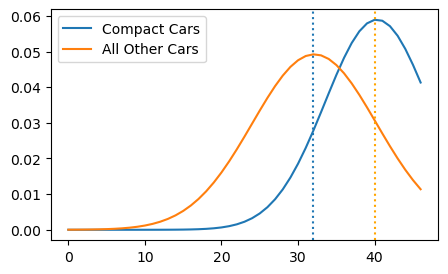

In [22]:
# set plot
x = np.arange(len(compact_cars))
y1 = compact_cars_distribution.pdf(x) # get density probability of compact cars
y2 = all_cars_distribution.pdf(x)


plt.figure(figsize=(5,3))
plt.plot(x, y1, label = 'Compact Cars')
plt.plot(x, y2, label = 'All Other Cars')
plt.axvline(32, ls = ':')
plt.axvline(40, ls = ':', color = 'orange')

plt.legend()
# plt.xlim(20,80)

In [23]:
# look at there mean
compact_cars.mean(), all_cars.mean()

(40.29117978849512, 32.12295511548135)

In [24]:
# look at there varience
compact_cars.var(), all_cars.var()

(45.795652289800174, 65.72768133082012)

**Step 2: Estabish Hypothesis**

I will decide my null hypothesis bases on the initial question.
- Null Hypothesis: Compact cars more fuel efficient than all other car class
- Alternate Hypothesis: Compact cars more fuel efficient than all other car class

**Step 3: Set Significant level**
- 0.05 for 95% accuracy

In [25]:
Alpha = 0.05

**Step 4: Verify Assumptions**
- Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)

In [26]:
len(compact_cars)

47

**Step 5: Compute test statistic and probability (t-statistic & p-value) using**

In [27]:
# impliment the one sample T-Test for our example
# Equal Variances (the scipy methods we will use has an argument to handle when variances aren't equal).
Final_t_stats,Final_p_value = stats.ttest_1samp(compact_cars, all_cars.mean())
p_value

0.08090336863534618

With my `p_value` being less the the `Alpha`, It shows that the **varience are not equal** in the two groups.

**Decide**

**Divide the p_value by 2 -> because we are looking at a sigle side question**

In [28]:
if (t_stats > 0) and ((Final_p_value/2) < Alpha):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

We can reject the null hypothesis


Because the `Final_p_value` is Less than the `Alpha`, we can reject the null hypothesis

**c. Do manual cars get better gas mileage than automatic cars?**

**Step 1: Plot the distributions**

In [29]:
# separate cars by transmission
manual_cars = mpg[mpg.trans.str.contains("manu")].total_miles
automatic_cars = mpg[mpg.trans.str.contains("auto")].total_miles

# get mean and std
manual_cars_mean, manual_cars_std = manual_cars.mean(), manual_cars.std()
automatic_cars_mmean, automatic_cars_std = automatic_cars.mean(), automatic_cars.std()

# create distribution
manual_cars_distribution = stats.norm(manual_cars_mean, manual_cars_std)
automatic_cars_distribution = stats.norm(automatic_cars_mmean, automatic_cars_std)

# gemerate ramdom values
manual_cars_sample_distribution = manual_cars_distribution.rvs(100_000)
automatic_cars_sample_distribution = automatic_cars_distribution.rvs(100_000)

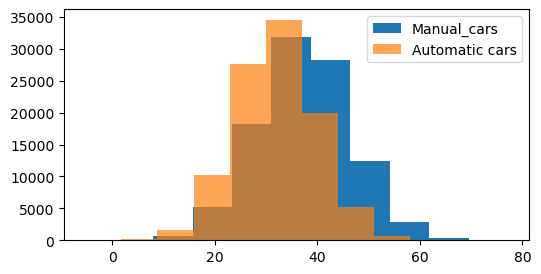

In [30]:
# set plot
plt.figure(figsize=(6,3))
plt.hist(manual_cars_sample_distribution, label= "Manual_cars")
plt.hist(automatic_cars_sample_distribution, label= "Automatic cars", alpha=.7)

plt.legend()
# plt.xlim(20,80)

In [31]:
# look at there mean
manual_cars.mean(), automatic_cars.mean()

(37.39176863387833, 31.984152049972298)

In [32]:
# look at there varience
manual_cars.var(), automatic_cars.var()

(80.40775958743583, 59.07832529096547)

**Step 2: Estabish Hypothesis**

I will decide my null hypothesis bases on the initial question.
- Null Hypothesis: Compact cars more fuel efficient than all other car class
- Alternate Hypothesis: Compact cars more fuel efficient than all other car class

**Step 3: Set Significant level**
- 0.05 for 95% accuracy

In [33]:
Alpha = 0.05

**Step 4: Verify Assumptions**
- Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)

In [34]:
len(manual_cars), len(automatic_cars)

(77, 157)

**Step 5: Compute test statistic and probability (t-statistic & p-value) using**

In [35]:
# To identify if varience is equal or not equal we run the levene function
# stats Levene test - returns p value. small p-value means unequal variances
t_stats,p_value = stats.levene(manual_cars_sample_distribution, automatic_cars_sample_distribution)
t_stats,p_value

(2008.3605745315592, 0.0)

With my `p_value` being greater the the `Alpha`, It shows that the **varience are not equal** in the two groups.

Now let plog it in the independent sample t-test.

In [36]:
# impliment the one sample T-Test for our example
# Equal Variances (the scipy methods we will use has an argument to handle when variances aren't equal).
Final_t_stats,Final_p_value = stats.ttest_ind(manual_cars_sample_distribution, automatic_cars_sample_distribution, equal_var=True)
p_value

0.0

In [37]:
if (t_stats > 0) and (Final_p_value < Alpha):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

We can reject the null hypothesis


Because the `Final_p_value` is greater than the `Alpha`, we can reject the null hypothesis

# Correlation

1. Answer with the type of stats test you would use (assume normal distribution):
- Is there a relationship between the length of your arm and the length of your foot?
    - Pearson's R corolation
- Do guys and gals quit their jobs at the same rate?
    - Chi-Squred 
- Does the length of time of the lecture correlate with a students grade?
    - pearson's R corolation beacause we have two conitniuos variables

2. Use the telco_churn data.
- a. Does tenure correlate with monthly charges?
- b. Total charges?
- c. What happens if you control for phone and internet service?

In [45]:
query = """
SELECT tenure, Monthly_Charges, total_charges, internet_service_type_id,phone_service 
FROM customers;
"""

telco = pd.read_sql(query, env.get_db_access("telco_churn"))
telco.head()

,tenure,Monthly_Charges,total_charges,internet_service_type_id,phone_service
0,9,65.6,593.3,1,Yes
1,9,59.9,542.4,1,Yes
2,4,73.9,280.85,2,Yes
3,13,98.0,1237.85,2,Yes
4,3,83.9,267.4,2,Yes


### A and B

**Step 1: Determin the appropriate test**
 - Because the question is looking for correlation (relationship + significance) between two variables, I will use the pearson's r test

**Step 2: Setup**

- Set null and alternate hypothesis and the alpha-values ().

    **a**

    - $H_0$: There is no correlation between tenure and monthy charges.
    - $H_a$: There is a correlation between tenure and monthy charges.

    **b**

    - $H_0$: There is no correlation between tenure and total charges.
    - $H_a$: There is correlation between tenure and total charges.


In [46]:
# confidence level
alpha = 0.05

**Step 3: Visualize**

In [48]:
# a bit of cleaning
telco = telco[telco["total_charges"] != " "]

<Axes: xlabel='Monthly_Charges', ylabel='tenure'>

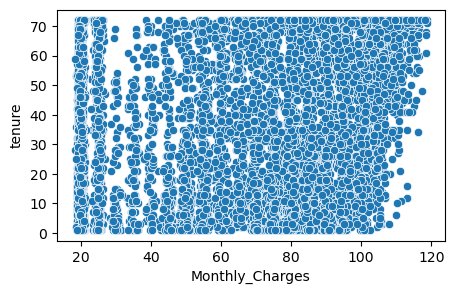

In [49]:
monthly_charges = telco["Monthly_Charges"]
est_tenure = telco["tenure"]

plt.figure(figsize=(5,3))
sns.scatterplot(y= monthly_charges, x= est_tenure)

<Axes: xlabel='tenure', ylabel='total_charges'>

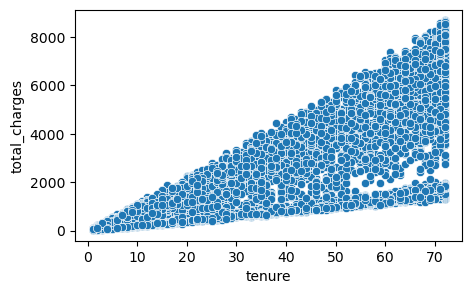

In [50]:
total_charges = telco.total_charges.astype(float)
est_tenure = telco.tenure

plt.figure(figsize=(5,3))
sns.scatterplot(x= est_tenure, y= total_charges)

**Step 4. Calculatate test statistics and p value**

In [51]:
r1, p_value1 = stats.pearsonr(monthly_charges, est_tenure)
r1, p_value1

(0.2468617666408956, 3.9898213232510553e-98)

In [53]:
r2, p_value2 = stats.pearsonr(total_charges, est_tenure)
r2, p_value2

(0.8258804609332071, 0.0)

**Step 5: Conclude**

In [54]:
def conclude(p_value, alpha):
    #evaluate p-value
    if p_value < alpha:
        print("We reject the null hypothesis")
    else:
        print("We fail to reject the null hypothesis")

In [57]:
# a
conclude(p_value1, alpha)

# b
conclude(p_value2, alpha)

We reject the null hypothesis
We reject the null hypothesis


**c. What happens if you control for phone and internet service?**

**Step 1: Determin the appropriate test**
 - Because the question is looking for correlation (relationship + significance) between two variables, I will use the pearson's r test

**Step 2: Setup**

- Set null and alternate hypothesis and the alpha-values ().

    - $H_0$: There is no correlation between phone service and monthly charges or total charges service.
    - $H_0$: There is a correlation between phone service and monthly charges or total charges service.
    
    - $H_02$: There is no correlation between internet service and monthly charges or total charges service.
    - $H_a2$: There is a correlation between internet service and monthly charges or total charges service.
    

In [58]:
alpha = 0.05

**Step 3: Visualize**

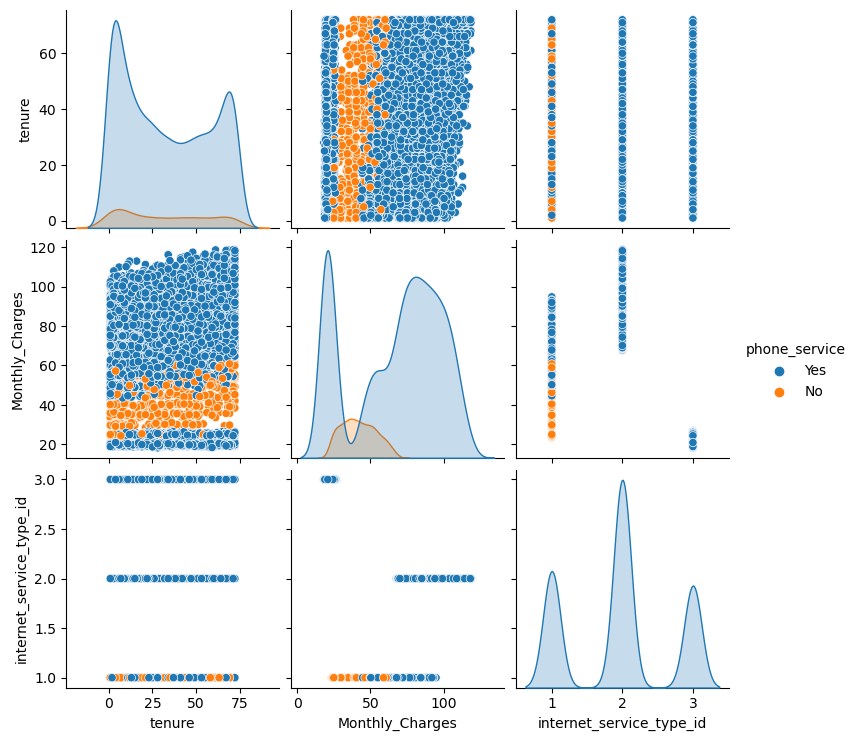

In [69]:
sns.pairplot(telco, hue="phone_service")

**Step 4. Calculatate test statistics and p value**

In [71]:
tests_dict = {
    telco.Monthly_Charges:telco.internet_service_type_id,
    telco.Monthly_Charges:telco.phone_service,
    telco.total_charges:telco.internet_service_type_id,
    telco.total_charges:telco.phone_service
}
for i,j in tests_dict.items():
    print(r,p = stats.pearsonr(i,j))

TypeError: unhashable type: 'Series'

we reject the null hypothesis that says there is no linear relationship between total charges and tenure.

3. Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [72]:
query = """
SELECT * 
FROM employees
JOIN salaries USING(emp_no)
WHERE to_date < now();
"""

employees = pd.read_sql(query, env.get_db_access("employees"))
telco.head()

,tenure,Monthly_Charges,total_charges,internet_service_type_id,phone_service
0,9,65.6,593.3,1,Yes
1,9,59.9,542.4,1,Yes
2,4,73.9,280.85,2,Yes
3,13,98.0,1237.85,2,Yes
4,3,83.9,267.4,2,Yes


a. Is there a relationship between how long an employee has been with the company and their salary?

**Step 1: Determin the appropriate test**
 - Because the question is looking for correlation (relationship + significance) between two variables, I will use the pearson's r test

**Step 2: Setup**

- Set null and alternate hypothesis and the alpha-values ().

    **a**
    - $H_0$: There is a relationship between how long an employee has been witht the company and thier salary.
    - $H_a$: There is no relationship between how long an employee has been witht the company and thier salary.
    
    **b**
    - $H_0$ There is no relationship between how long an employee has been witht the company and the number of titles they have had.
    - $H_a$: There is a relationship between how long an employee has been witht the company and the number of titles they have had.


In [73]:
alpha = 0.05

**Step 4**

In [92]:
# compate time difference
hire_date=pd.to_datetime(employees.hire_date)
to_date = pd.to_datetime(employees.to_date)

time_diff = to_date - hire_date
salary = employees.salary

TypeError: Cannot convert input [0         1987-06-26
1         1988-06-25
2         1989-06-25
3         1990-06-25
4         1991-06-25
             ...    
2603918   2001-12-25
2603919   1998-11-30
2603920   1999-11-30
2603921   2000-11-29
2603922   2001-11-29
Name: to_date, Length: 2603923, dtype: datetime64[ns]] of type <class 'pandas.core.series.Series'> to Timestamp

<Axes: ylabel='salary'>

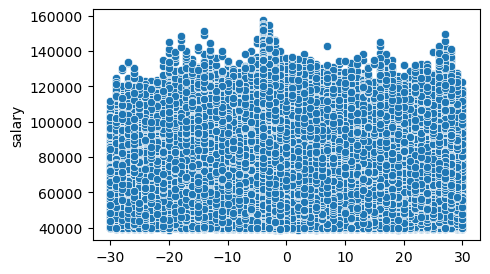

In [75]:
plt.figure(figsize=(5,3))
sns.scatterplot(x= time_diff, y= salary)

**Step 4**

In [132]:
r, p_value = stats.pearsonr(salary, time_diff)
r, p_value

(0.3625214524301347, 0.0)

**Step 5**

In [135]:
conclude(p_value, alpha)

We reject the null hypothesis


we reject the null hypothesis that says there is no linear relationship between how long an employee has been witht the company and thier salary



4. Use the sleepstudy data.
- Is there a relationship between days and reaction tim